## Logistic Regression for Imbalanced Dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# Generating imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [5]:
X,y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1, n_redundant=0,
                           weights=[0.9,0.1], random_state=10)

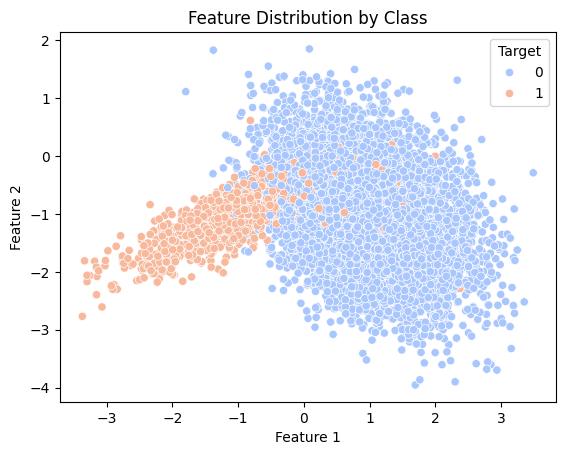

In [6]:
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Target', palette='coolwarm')
plt.title("Feature Distribution by Class")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.30,random_state=45)

In [8]:
# Hyperparameter tuning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [2.9,0.3,0.1,0.2,0.72,0.4,0.15,0.25,0.35,0.45]
solver = ['lifgs','sag','saga','newton-cg']
class_weight = [{0:w,0:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100] ]

In [10]:
params = dict(penalty=penalty, C=c_values, solver=solver, class_weight=class_weight)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring = 'accuracy', cv=cv,n_jobs=-1 )

In [15]:
grid.fit(X_train, y_train)

c:\Users\SHIVAM KUMAR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
6400 fits failed out of a total of 9600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
338 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SHIVAM KUMAR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\SHIVAM KUMAR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~

,estimator,LogisticRegression()
,param_grid,"{'C': [2.9, 0.3, ...], 'class_weight': [{0: 1}, {0: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lifgs', 'sag', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [16]:
grid.best_params_

{'C': 0.72, 'class_weight': {0: 1}, 'penalty': 'l2', 'solver': 'sag'}

In [17]:
grid.best_score_

np.float64(0.9576666666666667)

In [18]:
y_pred = grid.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9547142857142857
[[6220   43]
 [ 274  463]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6263
           1       0.92      0.63      0.74       737

    accuracy                           0.95      7000
   macro avg       0.94      0.81      0.86      7000
weighted avg       0.95      0.95      0.95      7000

